In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# grab the raw dataset
titanic = sns.load_dataset('titanic')

# remove columns we don't need
titanic = titanic.drop(['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis=1)

# take care of missing age entries by filling them in with the median age
titanic['age'].fillna(titanic.groupby('pclass')['age'].transform("median"), inplace=True)

# drop rows with missing elements
titanic.dropna(inplace=True)

# Convert categorical variable into dummy/indicator variables (1's and 0's, easier to work with)
new_sex = pd.get_dummies(titanic['sex'], drop_first=True)

# Convert categorical variable into dummy/indicator variables (1's and 0's, easier to work with)
new_embarked = pd.get_dummies(titanic['embarked'], drop_first=True)

# add dummy variables (columns) to dataframe
titanic = pd.concat([titanic, new_sex, new_embarked], axis=1)

# drop original categorical variables (columns)
titanic.drop(['sex', 'embarked'],axis=1, inplace=True)

# show first 5 rows as a demo
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [3]:
# library to split dataset into train and test
from sklearn.model_selection import train_test_split

# X is all possible features/independent variables
X = titanic.drop('survived', axis=1)
# Y is what we are modeling
Y = titanic['survived']

# split the data with 30% of rows going to the training set and a state seed of 1000 for consistency
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.3, random_state = 1000)

# print the shape of the split dataframes (rows, columns)
trainX.shape, trainY.shape, testX.shape, testY.shape

# we started with 889 observations - 622 are for training and 267 for testing

((622, 8), (622,), (267, 8), (267,))

In [4]:
from sklearn import tree

#make a tree with default options
tree1 = tree.DecisionTreeClassifier()

#fit with data
tree1 = tree1.fit(trainX, trainY)

print('the accuracy rate on training data is', tree1.score(trainX, trainY))

print('the accuracy rate on testing data is', tree1.score(testX, testY))

the accuracy rate on training data is 0.9887459807073955
the accuracy rate on testing data is 0.7827715355805244


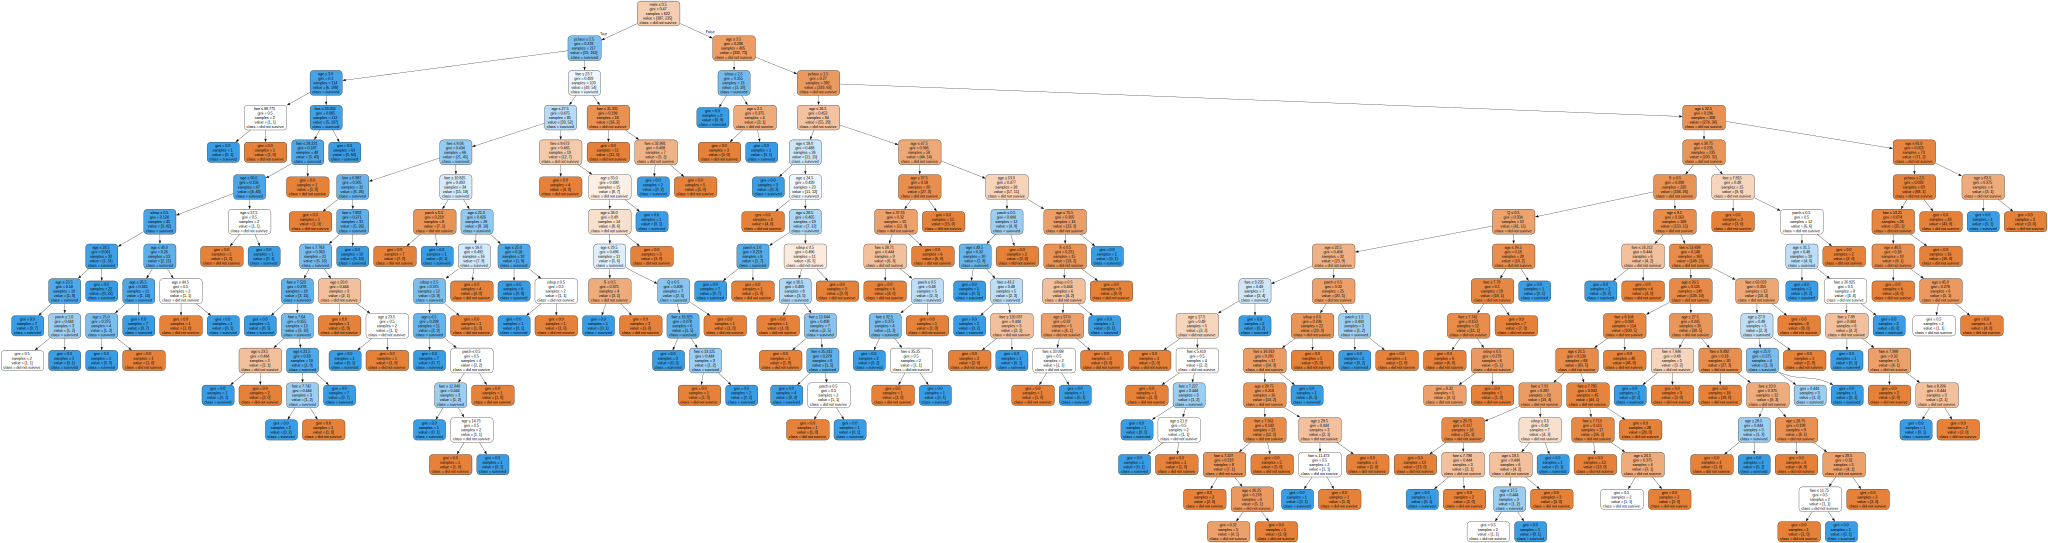

In [5]:
# create graph of decision tree
import graphviz
tree1_graph = tree.export_graphviz(tree1, out_file=None, 
            feature_names=['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S'],
            class_names = ['did not survive', 'survived']  ,                        
            filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(tree1_graph)  
graph 

In [6]:
# remake the tree, but with a max depth of 2
tree2 = tree.DecisionTreeClassifier(max_depth = 2)

# fit with data
tree2 = tree2.fit(trainX, trainY)

print('the accuracy rate on training data is', tree2.score(trainX, trainY))

print('the accuracy rate on testing data is', tree2.score(testX, testY))

the accuracy rate on training data is 0.8054662379421221
the accuracy rate on testing data is 0.7715355805243446


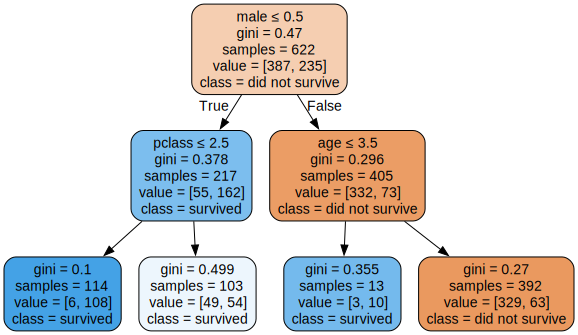

In [7]:
# create graph of second decision tree
import graphviz
tree2_graph = tree.export_graphviz(tree2, out_file=None, 
            feature_names=['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S'],
            class_names = ['did not survive', 'survived']  ,                        
            filled=True, rounded=True,  
            special_characters=True)
graph = graphviz.Source(tree2_graph)
graph

In [8]:
# multiple tree variants
tree3_1 = tree.DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1)
tree3_1.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_1.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_1.score(testX, testY) * 100))

Accuracy on the train set 80.547%
Accuracy on the test set 77.154%


In [9]:
tree3_2 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1)
tree3_2.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_2.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_2.score(testX, testY) * 100))

Accuracy on the train set 83.119%
Accuracy on the test set 79.775%


In [10]:
tree3_3 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10)
tree3_3.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_3.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_3.score(testX, testY) * 100))

Accuracy on the train set 82.797%
Accuracy on the test set 79.401%


In [11]:
tree3_4 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 25)
tree3_4.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_4.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_4.score(testX, testY) * 100))

Accuracy on the train set 81.994%
Accuracy on the test set 79.775%


In [12]:
tree3_5 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1)
tree3_5.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_5.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_5.score(testX, testY) * 100))

Accuracy on the train set 84.887%
Accuracy on the test set 80.899%


In [13]:
tree3_6 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10)
tree3_6.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_6.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_6.score(testX, testY) * 100))

Accuracy on the train set 84.244%
Accuracy on the test set 80.150%


In [14]:
tree3_7 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 25)
tree3_7.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_7.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_7.score(testX, testY) * 100))

Accuracy on the train set 81.994%
Accuracy on the test set 79.775%


In [15]:
tree3_8 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1)
tree3_8.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_8.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_8.score(testX, testY) * 100))

Accuracy on the train set 85.370%
Accuracy on the test set 80.150%


In [16]:
tree3_9 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10)
tree3_9.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_9.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_9.score(testX, testY) * 100))

Accuracy on the train set 84.405%
Accuracy on the test set 79.026%


In [17]:
tree3_10 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 25)
tree3_10.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_10.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_10.score(testX, testY) * 100))

Accuracy on the train set 82.315%
Accuracy on the test set 78.652%


In [18]:
tree3_11 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 1)
tree3_11.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_11.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_11.score(testX, testY) * 100))

Accuracy on the train set 88.103%
Accuracy on the test set 80.899%


In [19]:
tree3_12 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10)
tree3_12.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_12.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_12.score(testX, testY) * 100))

Accuracy on the train set 85.691%
Accuracy on the test set 79.026%


In [20]:
tree3_13 = tree.DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 25)
tree3_13.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_13.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_13.score(testX, testY) * 100))

Accuracy on the train set 82.315%
Accuracy on the test set 78.652%


In [21]:
tree3_14 = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 1)
tree3_14.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_14.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_14.score(testX, testY) * 100))

Accuracy on the train set 89.389%
Accuracy on the test set 80.150%


In [22]:
tree3_15 = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10)
tree3_15.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_15.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_15.score(testX, testY) * 100))

Accuracy on the train set 86.013%
Accuracy on the test set 79.026%


In [23]:
tree3_16 = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 25)
tree3_16.fit(trainX, trainY)

print("Accuracy on the train set {:.3f}%".format(tree3_16.score(trainX, trainY) * 100))
print("Accuracy on the test set {:.3f}%".format(tree3_16.score(testX, testY) * 100))

Accuracy on the train set 82.315%
Accuracy on the test set 78.652%
